In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# exploratory data analysis (EDA) 

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_data.shape

(1460, 81)

In [7]:
# Select numerical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
# select categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# check for missing numerical values in the dataframe
missing_values = train_data[numerical_columns].isnull().sum()
print("Missing values in numerical columns:\n", missing_values)

Missing values in numerical columns:
 Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


In [10]:
# check missing values in categorical columns
missing_values = train_data[categorical_columns].isnull().sum()
print("Missing values in numerical columns:\n", missing_values)

Missing values in numerical columns:
 MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64


In [11]:
# Fill missing values in numerical columns using forward fill
for column in numerical_columns:
    train_data[column].fillna(train_data[column].median(), inplace=True)
    
# Check if there are any remaining missing values
print("Remaining missing values:\n", train_data.isnull().sum())

Remaining missing values:
 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [12]:
# filling missing values in categorical columns
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    
# Check if there are any remaining missing values
print("Remaining missing values:\n", train_data.isnull().sum())

Remaining missing values:
 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


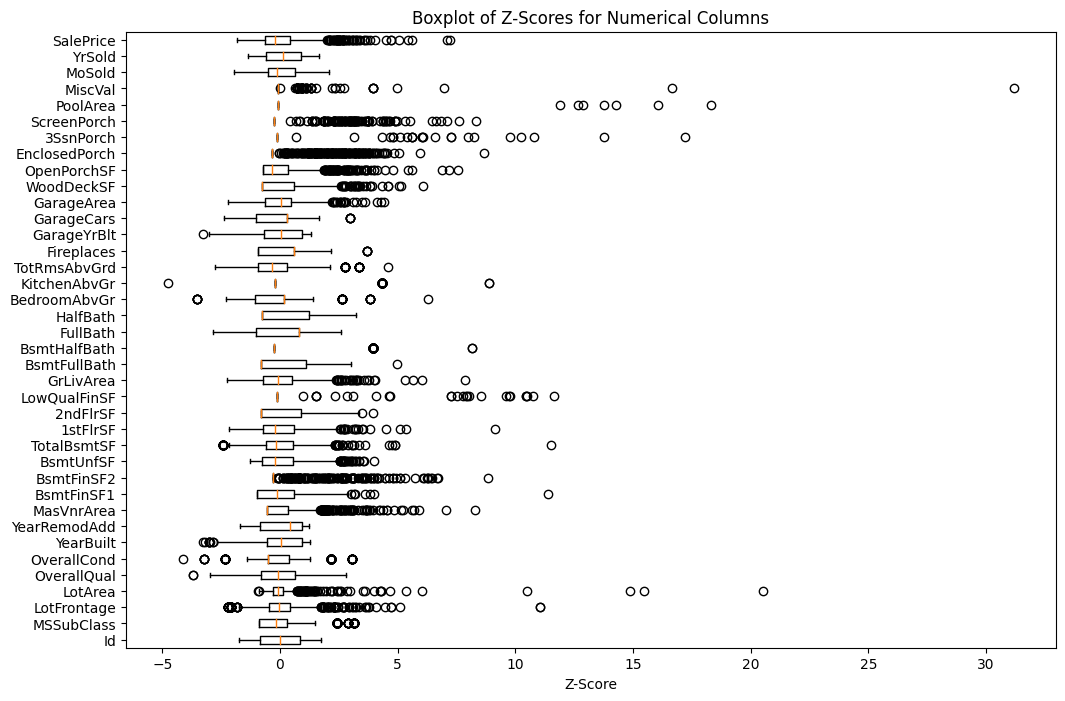

In [13]:
# outlier detection
z_scores = zscore(train_data[numerical_columns])

z_scores_train_data = pd.DataFrame(z_scores, columns=numerical_columns)

plt.figure(figsize=(12, 8))
plt.boxplot(z_scores_train_data.values, labels=numerical_columns, vert=False)
plt.title('Boxplot of Z-Scores for Numerical Columns')
plt.xlabel('Z-Score')
plt.show()

In [14]:
# Define a function to remove outliers using Box-Cox transformation
def remove_outliers_boxcox(data):
    # Added a small constant to handle zero and negative values--close to one
    data = data - data.min() + 1e-6
    transformed_data, _ = boxcox(data)
    return transformed_data

# Apply Box-Cox transformation to numerical columns
transformed_numerical_columns = train_data[numerical_columns].apply(remove_outliers_boxcox)
transformed_numerical_columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.441168e+00,4.361381,14.426874,34.535594,3.932792,2.231755,1053.191238,8.587375,4.503021,9.535654,...,-15.259505,4.386106,-459.746412,-4.838111e+18,-14366.279484,-1.141988e+61,-1.353299e+08,9.999998e-07,7.610858e-01,164.853004
1,9.999998e-07,-7.977030,17.517547,36.046260,3.237494,3.865770,742.639094,6.067156,-21.831971,10.208112,...,5.473349,-11.223684,-459.746412,-4.838111e+18,-14366.279484,-1.141988e+61,-1.353299e+08,2.080222e+00,9.999996e-07,155.647672
2,8.900935e-01,4.361381,15.075276,37.963082,3.932792,2.231755,1028.950654,8.511500,4.364762,8.793633,...,-15.259505,3.964297,-459.746412,-4.838111e+18,-14366.279484,-1.141988e+61,-1.353299e+08,3.890974e+00,7.610858e-01,169.559140
3,1.647517e+00,4.673622,13.305286,35.983918,3.932792,2.231755,194.773237,5.285650,-21.831971,7.281405,...,-15.259505,3.760010,2.350829,-4.838111e+18,-14366.279484,-1.141988e+61,-1.353299e+08,9.999998e-07,-3.667641e+00,138.974530
4,2.329886e+00,4.361381,18.286134,40.923213,4.603674,2.231755,1016.902223,8.356851,4.913907,9.384252,...,5.066557,4.751648,-459.746412,-4.838111e+18,-14366.279484,-1.141988e+61,-1.353299e+08,4.984832e+00,7.610858e-01,177.297280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.241105e+02,4.361381,13.760469,33.773603,3.237494,2.231755,1004.901942,8.356851,-21.831971,-7.186464,...,-15.259505,3.909515,-459.746412,-4.838111e+18,-14366.279484,-1.141988e+61,-1.353299e+08,3.486402e+00,9.999996e-07,153.265148
1456,2.242180e+02,-7.977030,18.475191,39.921474,3.237494,2.814186,764.366149,7.331977,4.137419,9.764957,...,5.618921,-11.223684,-459.746412,-4.838111e+18,-14366.279484,-1.141988e+61,-1.353299e+08,9.999998e-07,1.676087e+00,165.335529
1457,2.243256e+02,4.673622,14.644924,35.334073,3.932792,4.350036,398.962010,8.809553,-21.831971,7.718011,...,-15.259505,4.367320,-459.746412,-4.838111e+18,-14366.279484,-1.141988e+61,7.254296e-01,2.080222e+00,1.676087e+00,181.798673
1458,2.244331e+02,-7.977030,15.075276,36.191060,2.511647,2.814186,480.385792,8.035022,-21.831971,4.834861,...,5.662683,-11.223684,2.220692,-4.838111e+18,-14366.279484,-1.141988e+61,-1.353299e+08,1.509415e+00,1.676087e+00,139.925919


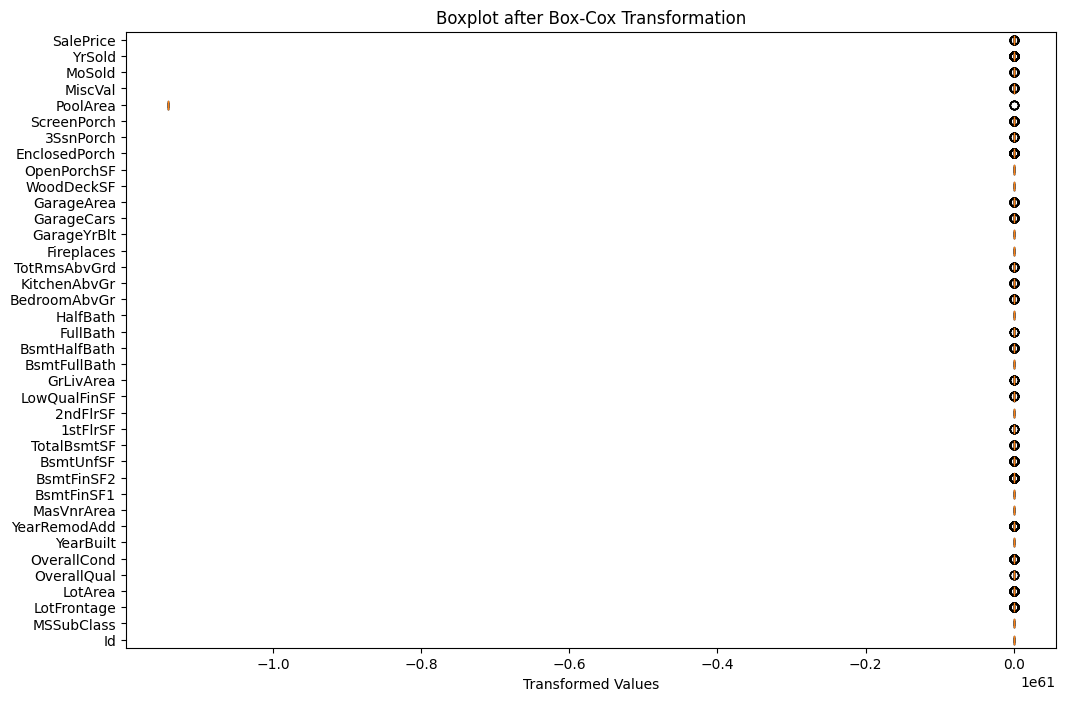

In [15]:
# Plot boxplots of the transformed columns
plt.figure(figsize=(12, 8))
plt.boxplot(transformed_numerical_columns.values, labels=numerical_columns, vert=False)
plt.title('Boxplot after Box-Cox Transformation')
plt.xlabel('Transformed Values')
plt.show()

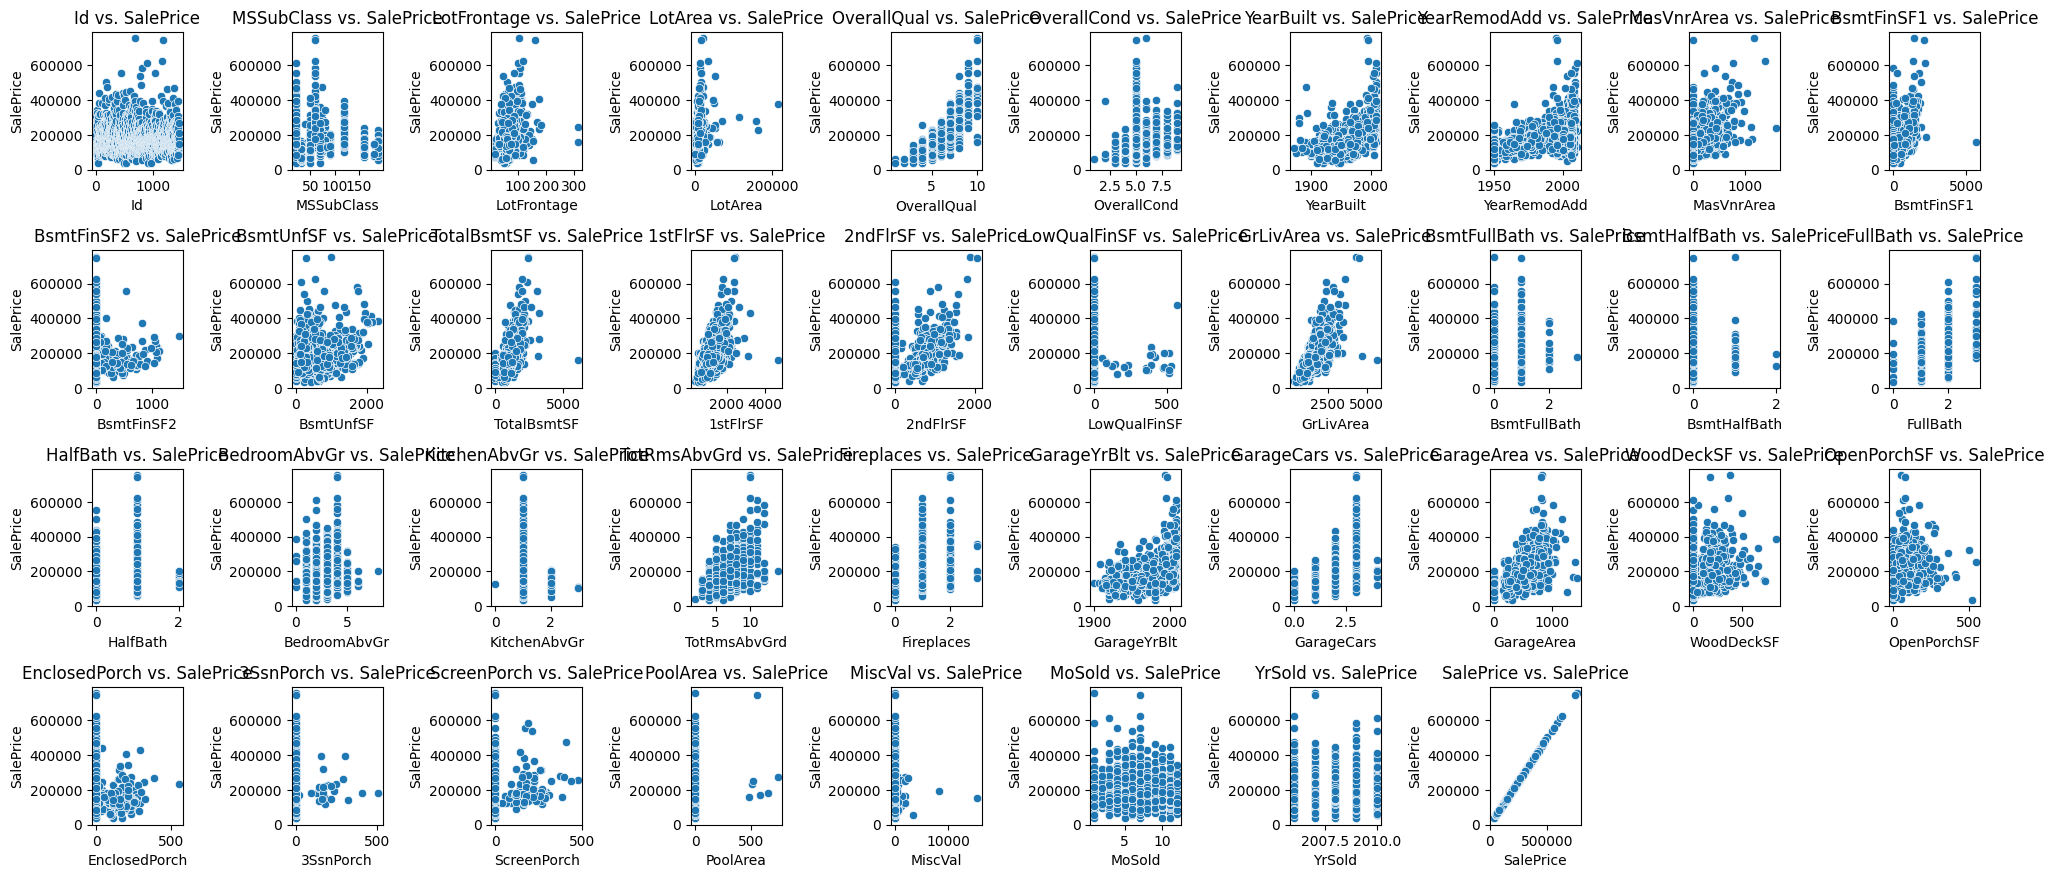

In [16]:
# Scatter plots of numerical features against the target variable (SalePrice)
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(7, 10, i)
    sns.scatterplot(x=train_data[column], y=train_data['SalePrice'])
    plt.title(f'{column} vs. SalePrice')
plt.tight_layout()
plt.show()

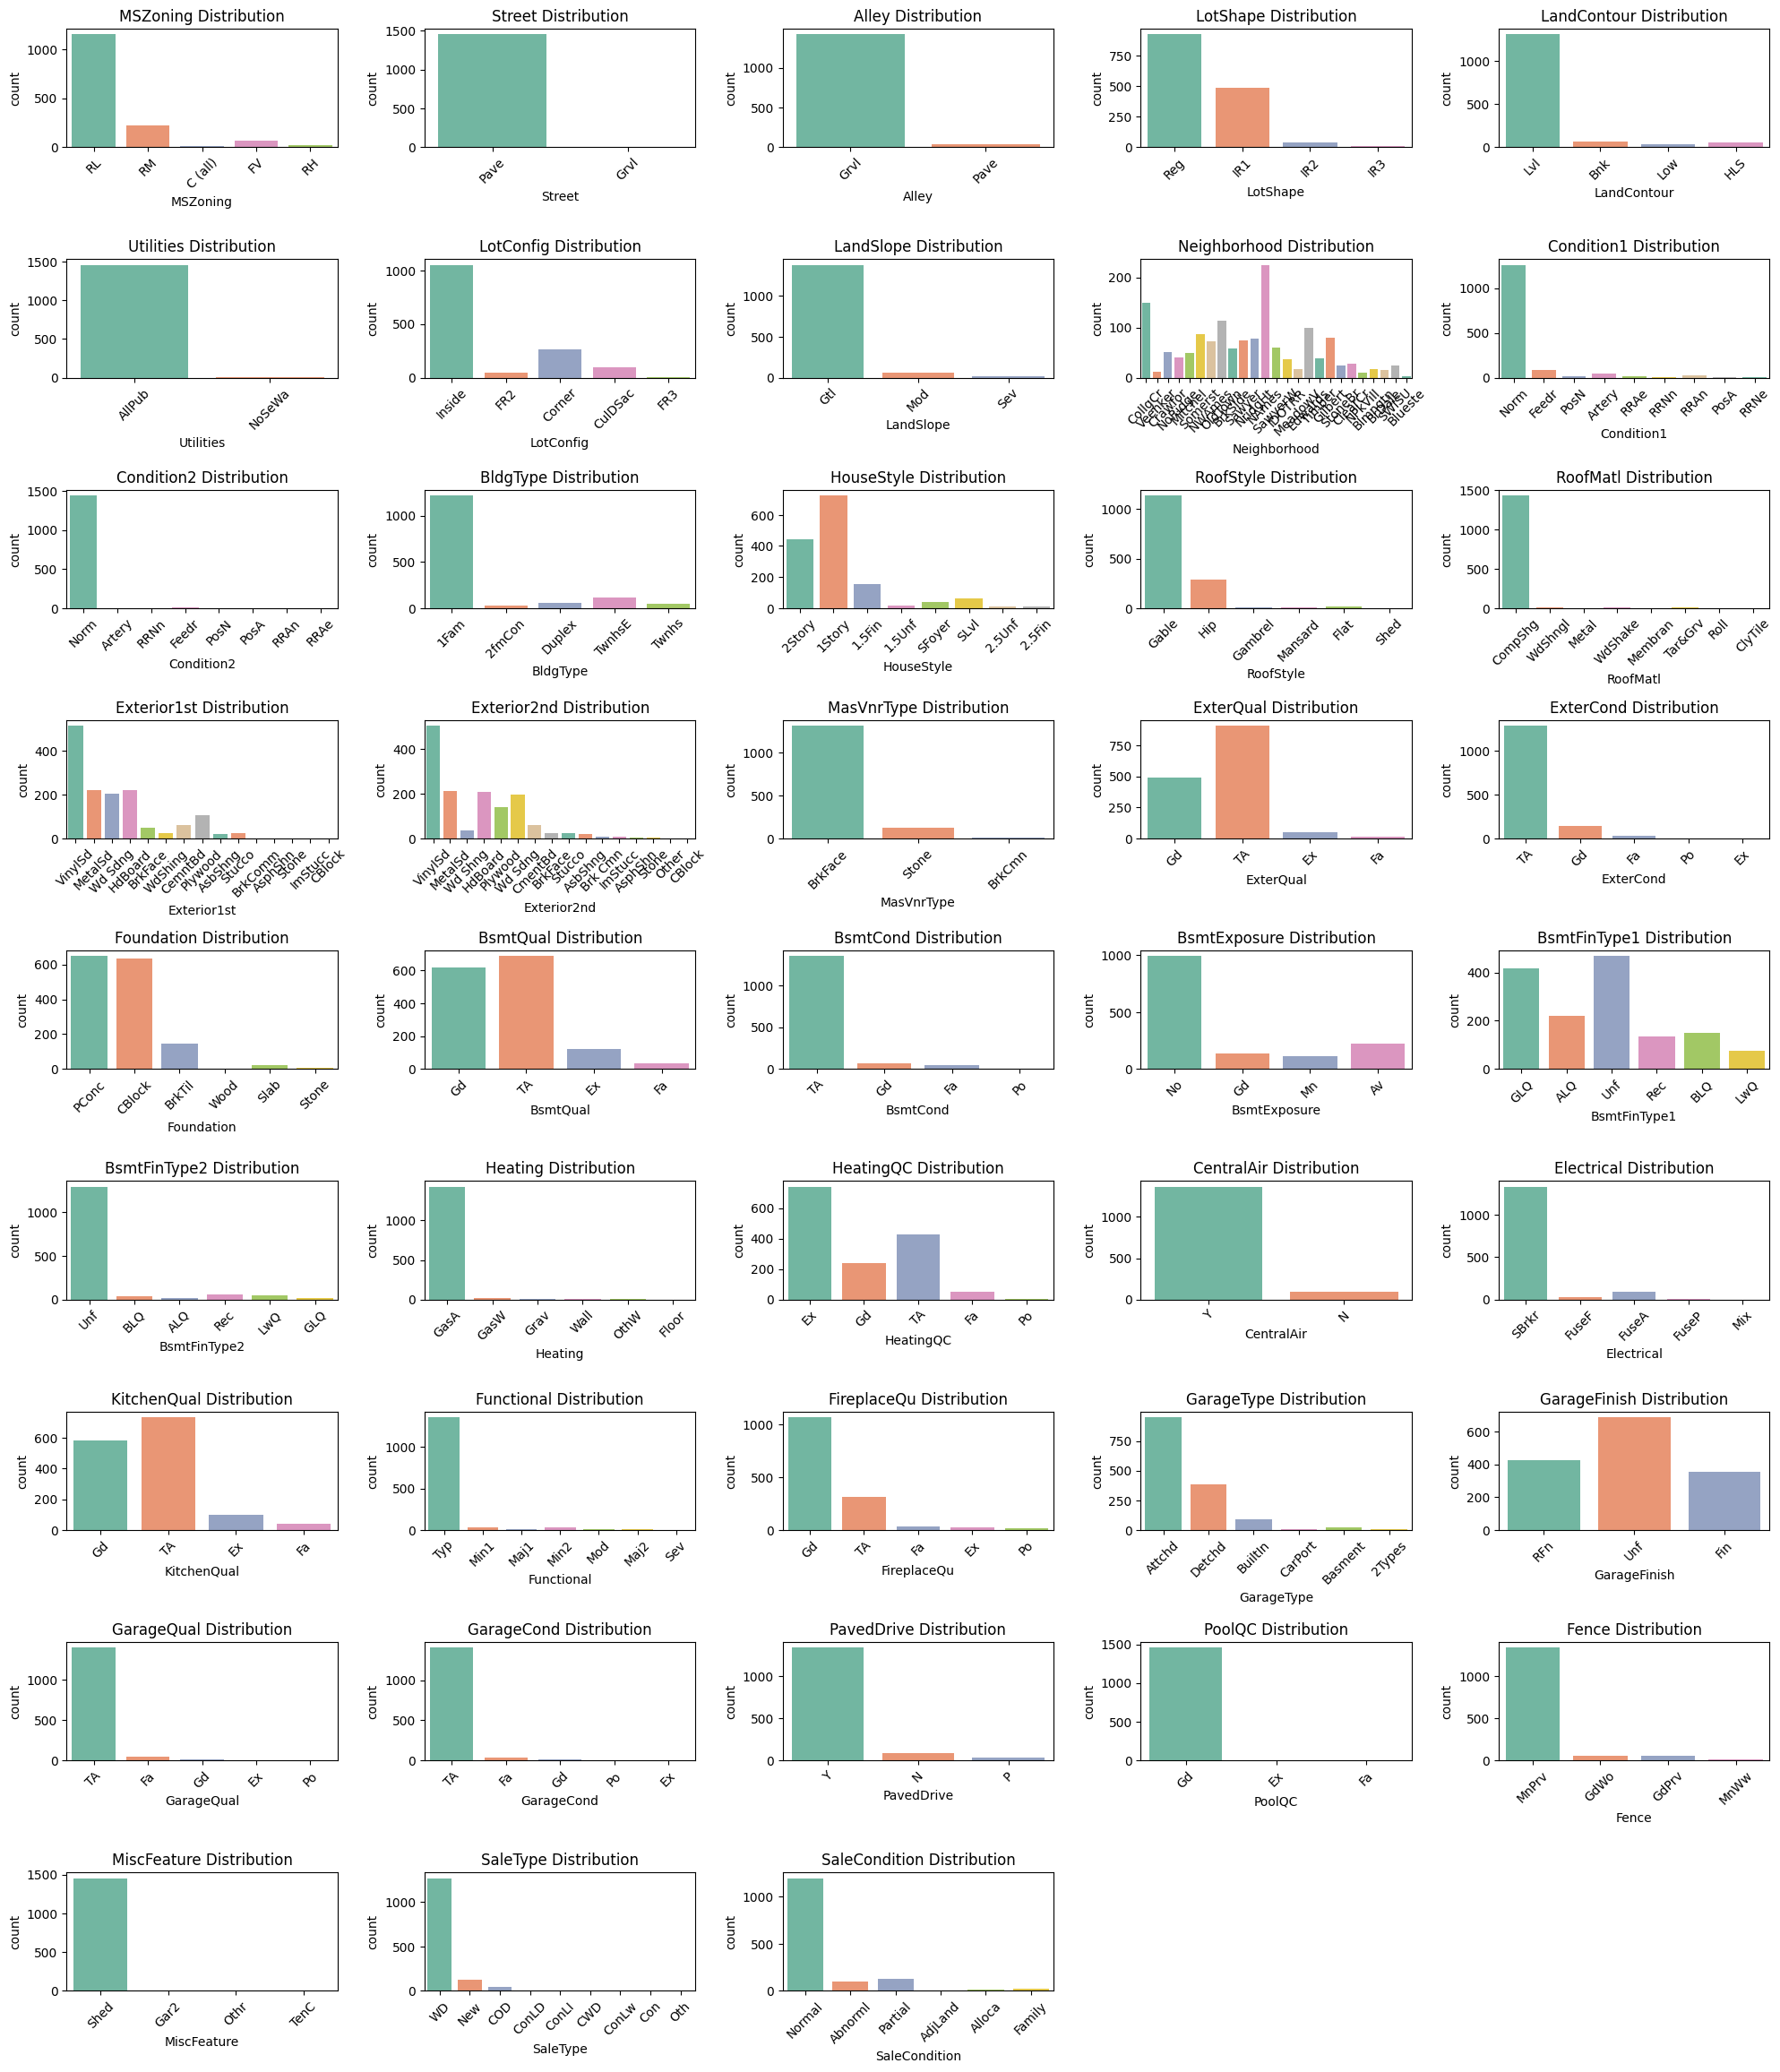

In [17]:
# Bar plots of categorical features
plt.figure(figsize=(20, 25))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(10, 5, i)
    sns.countplot(x=column, data=train_data, palette="Set2")
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
ordinal_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
                'GarageQual', 'GarageCond', 'PoolQC']

nominal_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 
                'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [19]:
from sklearn.preprocessing import LabelEncoder
# Initialize label encoder
label_encoder = LabelEncoder()

# Encode ordinal columns
for col in ordinal_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# One-hot encode nominal columns
train_data = pd.get_dummies(train_data, columns=nominal_cols, drop_first=True)

In [20]:
# Concatenate numerical and encoded categorical columns
final_data = pd.concat([transformed_numerical_columns, train_data], axis=1)

# Display the first few rows of the final dataset
final_data.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.441168e+00,4.361381,14.426874,34.535594,3.932792,2.231755,1053.191238,8.587375,4.503021,9.535654,...,False,False,False,False,True,False,False,False,True,False
1,9.999998e-07,-7.977030,17.517547,36.046260,3.237494,3.865770,742.639094,6.067156,-21.831971,10.208112,...,False,False,False,False,True,False,False,False,True,False


In [21]:
# Split the dataset into features (X) and target variable (y)
X = final_data.drop('SalePrice', axis=1)
y = final_data['SalePrice']

In [22]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1168, 258) (1168, 2)
Testing set shape: (292, 258) (292, 2)


In [23]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [24]:
# Initialize the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
# Make predictions on the testing set
y_pred = linear_reg_model.predict(X_test_scaled)

In [26]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.2976763204404274e+28
Mean Absolute Error: 6424011148232.101
R-squared: -2.3221173489482255e+18


In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Specify the degree of the polynomial
degree = 2

# Create a pipeline for Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
poly_model.fit(X_train_scaled, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [28]:
# Evaluate the model score on the testing data
poly_model_score = poly_model.score(X_test_scaled, y_test)
print("Polynomial Regression Score:", poly_model_score)

Polynomial Regression Score: 0.7957393888805235


In [29]:
# Make predictions on the test data
poly_predictions = poly_model.predict(X_test_scaled)

In [30]:
# Calculate evaluation metrics
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_rmse = np.sqrt(poly_mse)
poly_mae = mean_absolute_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

print("Polynomial Regression Metrics:")
print("Mean Squared Error:", poly_mse)
print("Root Mean Squared Error:", poly_rmse)
print("Mean Absolute Error:", poly_mae)
print("R-squared:", poly_r2)

Polynomial Regression Metrics:
Mean Squared Error: 668865144.7131196
Root Mean Squared Error: 25862.427278063435
Mean Absolute Error: 12067.926875711843
R-squared: 0.7957393888805235


In [31]:
from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # You can tune the alpha parameter
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [32]:
# Make predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Metrics:")
print("Mean Squared Error:", mse_lasso)
print("Mean Absolute Error:", mae_lasso)
print("R-squared:", r2_lasso)

Lasso Regression Metrics:
Mean Squared Error: 960329865.0814546
Mean Absolute Error: 10402.390651627784
R-squared: 0.8117424412953866


In [33]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=0.01)  # You can tune the alpha parameter
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.01)

In [34]:
# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)

Ridge Regression Metrics:
Mean Squared Error: 1918662043.6459389
Mean Absolute Error: 11334.764758253716
R-squared: 0.6645618026975861


Fine-Tuning: Experiment with different regression algorithms and hyperparameters to improve model performance. Consider feature engineering techniques such as creating polynomial features or adding interaction terms.
Deployment: Once satisfied with the model performance, deploy the regression model to predict house prices for new data. Monitor model performance over time and update as necessary.